In [38]:

import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [39]:
path_csv = "/kaggle/input/bike-sharing-dataset/day.csv"

DataFrame = pd.read_csv(path_csv)
DataFrame["dteday"] = pd.to_datetime(DataFrame["dteday"])
DataFrame.set_index('dteday', inplace=True)
DataFrame = DataFrame.drop("instant", axis = 1)
print(DataFrame.loc["2012-10-28" : "2012-11-10"])

            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2012-10-28       4   1    10        0        0           0           2   
2012-10-29       4   1    10        0        1           1           3   
2012-10-30       4   1    10        0        2           1           2   
2012-10-31       4   1    10        0        3           1           2   
2012-11-01       4   1    11        0        4           1           2   
2012-11-02       4   1    11        0        5           1           1   
2012-11-03       4   1    11        0        6           0           2   
2012-11-04       4   1    11        0        0           0           1   
2012-11-05       4   1    11        0        1           1           1   
2012-11-06       4   1    11        0        2           1           1   
2012-11-07       4   1    11        0        3           1           2   
2012-11-08       4   1    11        0 

In [40]:
"""
path_csv_H = "/kaggle/input/bike-sharing-dataset/hour.csv"
DataFrame_H = pd.read_csv(path_csv_H)
DataFrame_H["dteday"] = DataFrame_H["dteday"].astype(str) + " " + DataFrame_H["hr"].astype(str) + ":0:0"
DataFrame_H["dteday"] = pd.to_datetime(DataFrame_H["dteday"])
DataFrame_H.set_index('dteday', inplace=True)
DataFrame_H = DataFrame_H.drop(["instant","hr"], axis = 1)
print(DataFrame_H)


# 2. IL CUORE DEL PROCESSO: .resample() + .agg()
# 'D' sta per Daily (giornaliero). 
# Creiamo un nuovo dataframe con le statistiche della giornata.
features_giornaliere = DataFrame_H['cnt'].resample('D').agg([
    'sum',   # Totale bici (questo è il tuo target classico)
    'max',   # Picco massimo orario (es. alle 17:00 c'erano 500 bici)
    'min',   # Minimo orario (es. alle 04:00 c'erano 0 bici)
    'std',   # Volatilità: quanto varia la domanda durante il giorno?
    'mean'   # Media oraria
])

# Rinominiamo le colonne per chiarezza
features_giornaliere.columns = [
    'cnt_total', 'picco_max_orario', 'minimo_orario', 'volatilita_giornata', 'media_oraria'
]

# 3. FEATURE AVANZATA: Distinguere fasce orarie (Morning vs Evening)
# Spesso le bici si usano per andare al lavoro (8-9) o tornare (17-18).
# Estraiamo queste info specifiche.

# Filtriamo solo le ore di punta (es. 7-9 e 17-19)
ore_punta = DataFrame_H[DataFrame_H.index.hour.isin([7, 8, 9, 17, 18, 19])]
# Raggruppiamo per giorno
volume_ore_punta = ore_punta['cnt'].resample('D').sum()

# Aggiungiamo questa colonna al nostro dataset di features
features_giornaliere['bici_in_ore_punta'] = volume_ore_punta

# Visualizziamo il risultato
print(features_giornaliere.head())

"""

'\npath_csv_H = "/kaggle/input/bike-sharing-dataset/hour.csv"\nDataFrame_H = pd.read_csv(path_csv_H)\nDataFrame_H["dteday"] = DataFrame_H["dteday"].astype(str) + " " + DataFrame_H["hr"].astype(str) + ":0:0"\nDataFrame_H["dteday"] = pd.to_datetime(DataFrame_H["dteday"])\nDataFrame_H.set_index(\'dteday\', inplace=True)\nDataFrame_H = DataFrame_H.drop(["instant","hr"], axis = 1)\nprint(DataFrame_H)\n\n\n# 2. IL CUORE DEL PROCESSO: .resample() + .agg()\n# \'D\' sta per Daily (giornaliero). \n# Creiamo un nuovo dataframe con le statistiche della giornata.\nfeatures_giornaliere = DataFrame_H[\'cnt\'].resample(\'D\').agg([\n    \'sum\',   # Totale bici (questo è il tuo target classico)\n    \'max\',   # Picco massimo orario (es. alle 17:00 c\'erano 500 bici)\n    \'min\',   # Minimo orario (es. alle 04:00 c\'erano 0 bici)\n    \'std\',   # Volatilità: quanto varia la domanda durante il giorno?\n    \'mean\'   # Media oraria\n])\n\n# Rinominiamo le colonne per chiarezza\nfeatures_giornaliere.c

In [41]:
DataFrame.info()


Nan_val = DataFrame.isnull().sum().sum()

if Nan_val > 0: 
    print("Sono presenti ", Nan_val, " valori nulli")
else:
    print("Non sono presenti valori nulli")

Duplicati = DataFrame.duplicated().sum()

if Duplicati > 0: 
    print("Sono presenti ", Duplicati, " duplicati")
else:
    print("Non sono presenti Duplicati")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 101.8 KB
Non sono presenti valori nulli
Non sono presenti Duplicati


# Prima Visualizzazione dei Dati 

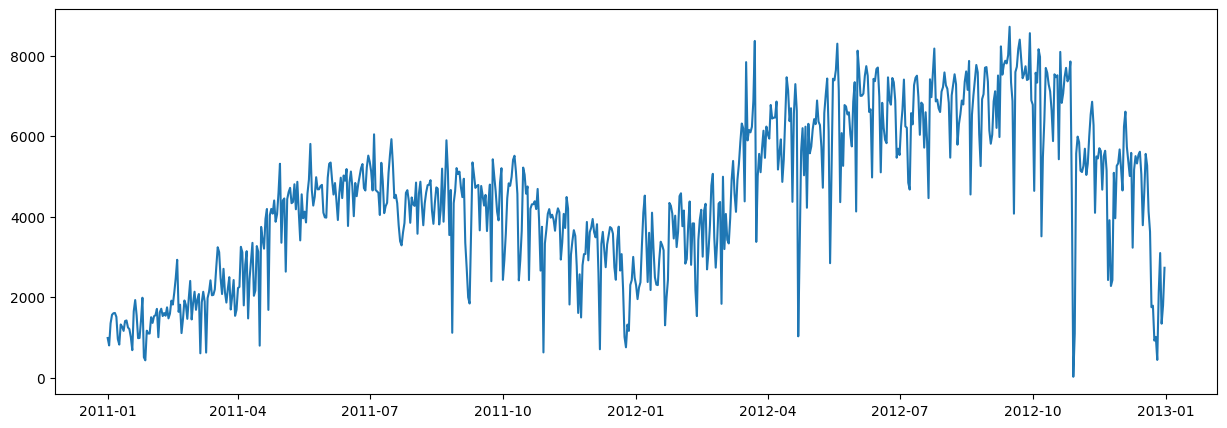

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(DataFrame["cnt"])

plt.show()

# Analisi Outlier

Detected 0 outliers.
Outlier dates saved in list `outlier_dates`.
[]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


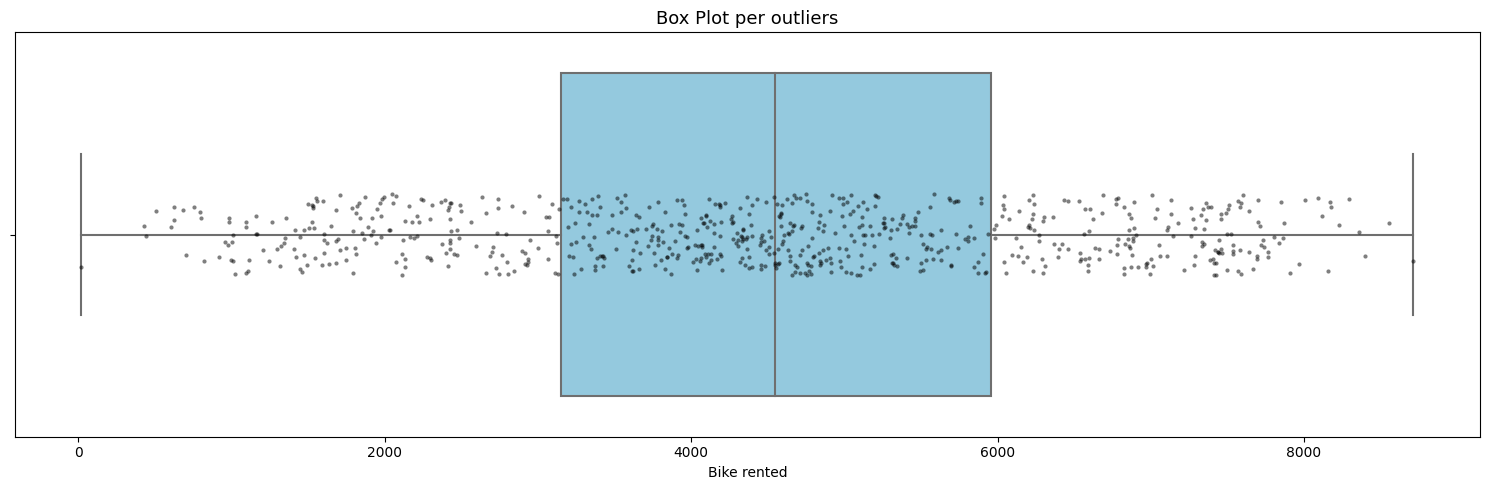

In [43]:
# Detect outliers

Q1, Q3 = DataFrame["cnt"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
outliers = DataFrame["cnt"][(DataFrame["cnt"] < lower_bound) | (DataFrame["cnt"] > upper_bound)]

# Save outlier dates for later use
outlier_dates = list(outliers.index)
print(f"Detected {len(outliers)} outliers.")
print("Outlier dates saved in list `outlier_dates`.")
print(outlier_dates)


plt.figure(figsize=(15, 5))
sns.boxplot(x = DataFrame["cnt"], color='skyblue', fliersize=5)
sns.stripplot(x = DataFrame["cnt"], color='black', size=3, jitter=True, alpha=0.5)
plt.title("Box Plot per outliers", fontsize=13)
plt.xlabel("Bike rented")
plt.tight_layout()
plt.show()

In [44]:
#Sebbene il boxplot non colga nessun outlier è possibile osservare un crollo totale nel giorno 2012/10/29, ciò è dovuto all'avvento di un uragano nella citta di Washington
#Ho deciso di gestire l'outlier aggiungendo una features che chiamero "Catastrofic_evts"

DataFrame['Catastrofic_evts'] = np.where(DataFrame.index == '2012-10-29', 1, 0)

print(DataFrame.loc["2012-10-29","Catastrofic_evts"])



1.0


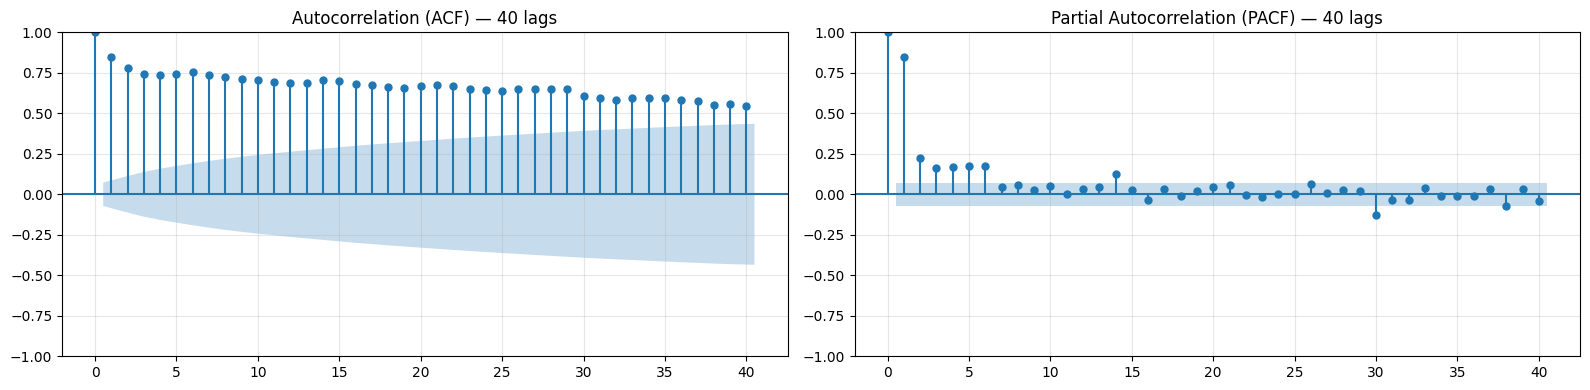

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF_LAGS = 40
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(DataFrame["cnt"], lags=ACF_LAGS, ax=axes[0])
axes[0].set_title(f"Autocorrelation (ACF) — {ACF_LAGS} lags")
plot_pacf(DataFrame["cnt"], lags=ACF_LAGS, ax=axes[1])
axes[1].set_title(f"Partial Autocorrelation (PACF) — {ACF_LAGS} lags")

for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analisi della distribuzione

Risultati Test Augmented Dickey-Fuller
------------------------------------
ADF Statistic: -1.8774
p-value: 0.3427
Result: La distribuzione non è stazionaria


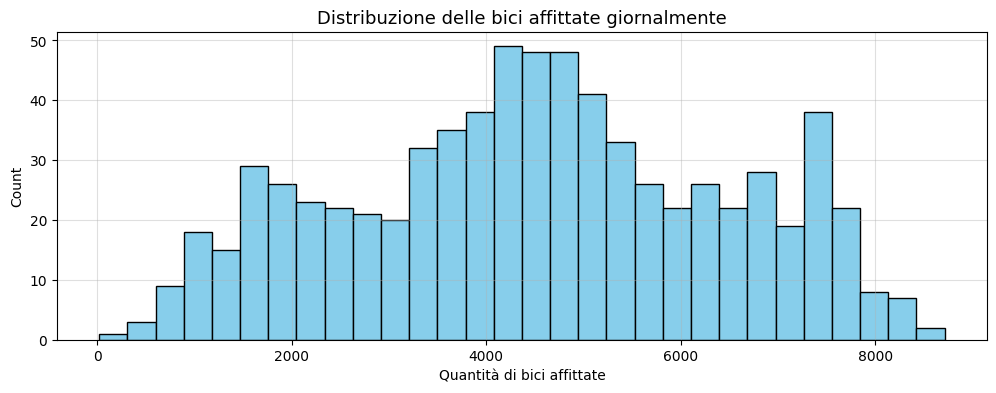

In [46]:
from statsmodels.tsa.stattools import adfuller
#Test di normalità

adf_result = adfuller(DataFrame["cnt"])
adf_pval = adf_result[1]

print("Risultati Test Augmented Dickey-Fuller")
print("------------------------------------")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_pval:.4f}")
print(f"Result: {'La distribuzione è stazionaria' if adf_pval < 0.05 else 'La distribuzione non è stazionaria'}")


plt.figure(figsize=(12, 4))
plt.hist(DataFrame["cnt"],bins = 30,  edgecolor='black', color='skyblue')
plt.title("Distribuzione delle bici affittate giornalmente", fontsize=13)
plt.xlabel("Quantità di bici affittate"); plt.ylabel("Count")
plt.grid(alpha=0.4)
plt.show()

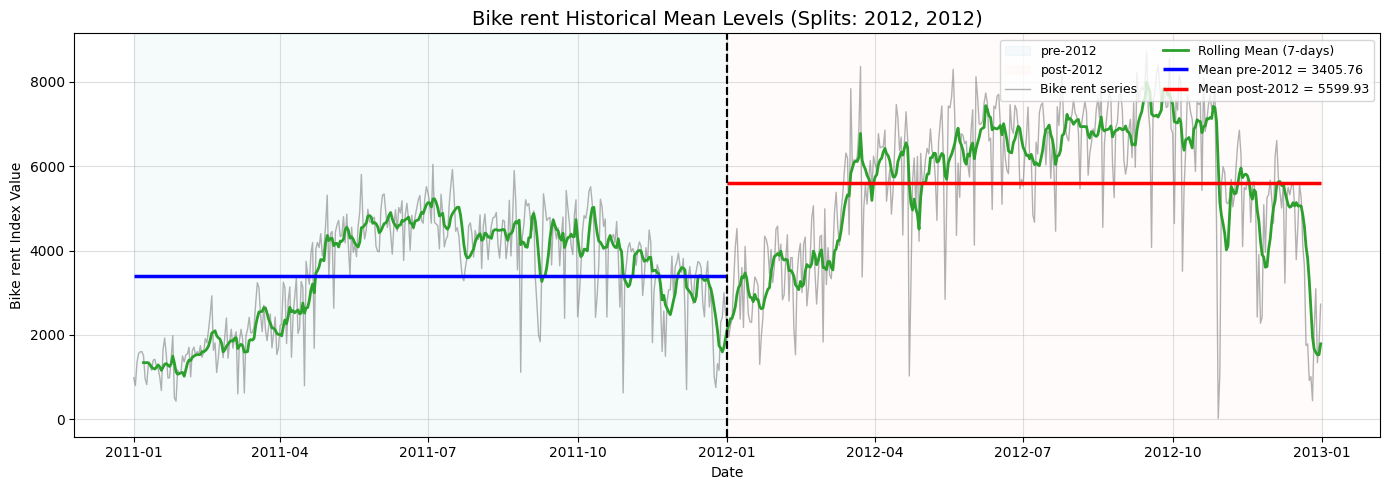

📊 Historical bike rent Means (splits 2012):
• pre-2012: 3405.7616
• post-2012: 5599.9344


In [47]:
# ==== 1) Define thresholds (edit these – everything else updates) ====
t1 = pd.Timestamp("2012-01-01")  # First split


# ==== 2) Period labels (auto) ====
period_labels = [
    f"pre-{t1.year}",
    f"post-{t1.year}"
]

# ==== 3) Masks ====
mask_pre  = DataFrame["cnt"].index < t1
mask_post = DataFrame["cnt"].index >= t1

# ==== 4) Means ====
mean_pre  = DataFrame["cnt"][mask_pre].mean()  
mean_post = DataFrame["cnt"][mask_post].mean() 

# ==== 5) Rolling mean ====
ROLL_WINDOW = 7
roll_mean = DataFrame["cnt"].rolling(ROLL_WINDOW).mean()

# ==== 6) Plot ====
fig, ax = plt.subplots(figsize=(14, 5))

# Era shading
ax.axvspan(DataFrame["cnt"].index.min(), t1, color='lightblue',  alpha=0.12, label=period_labels[0])
ax.axvspan(t1, DataFrame["cnt"].index.max(),color='mistyrose',   alpha=0.12, label=period_labels[1])

# Series and rolling mean
ax.plot(DataFrame["cnt"].index, DataFrame["cnt"].values, color='gray', lw=1, alpha=0.6, label='Bike rent series')
ax.plot(roll_mean.index, roll_mean.values, color='tab:green', lw=2,
        label=f'Rolling Mean ({ROLL_WINDOW}-days)')

# Horizontal mean lines for each period (only if data exists)
if DataFrame["cnt"][mask_pre].size:
    ax.hlines(mean_pre, DataFrame["cnt"].index.min(), t1, colors='blue', lw=2.5,
              label=f"Mean {period_labels[0]} = {mean_pre:.2f}")
if DataFrame["cnt"][mask_post].size:
    ax.hlines(mean_post, t1, DataFrame["cnt"].index.max(), colors='red', lw=2.5,
             label=f"Mean {period_labels[1]} = {mean_post:.2f}")

# Vertical separators
ax.axvline(t1, color='black', lw=1.5, ls='--')
ax.axvline(t1, color='black', lw=1.5, ls='--')

# Formatting
ax.set_title(f"Bike rent Historical Mean Levels (Splits: {t1.year}, {t1.year})", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Bike rent Index Value")
ax.legend(loc='upper right', fontsize=9, ncol=2, frameon=True)
ax.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# ==== 7) Summary ====
print(f"📊 Historical bike rent Means (splits {t1.year}):")
print(f"• {period_labels[0]}: {mean_pre:.4f}"  if np.isfinite(mean_pre)  else f"• {period_labels[0]}: n/a")
print(f"• {period_labels[1]}: {mean_post:.4f}" if np.isfinite(mean_post) else f"• {period_labels[1]}: n/a")


725


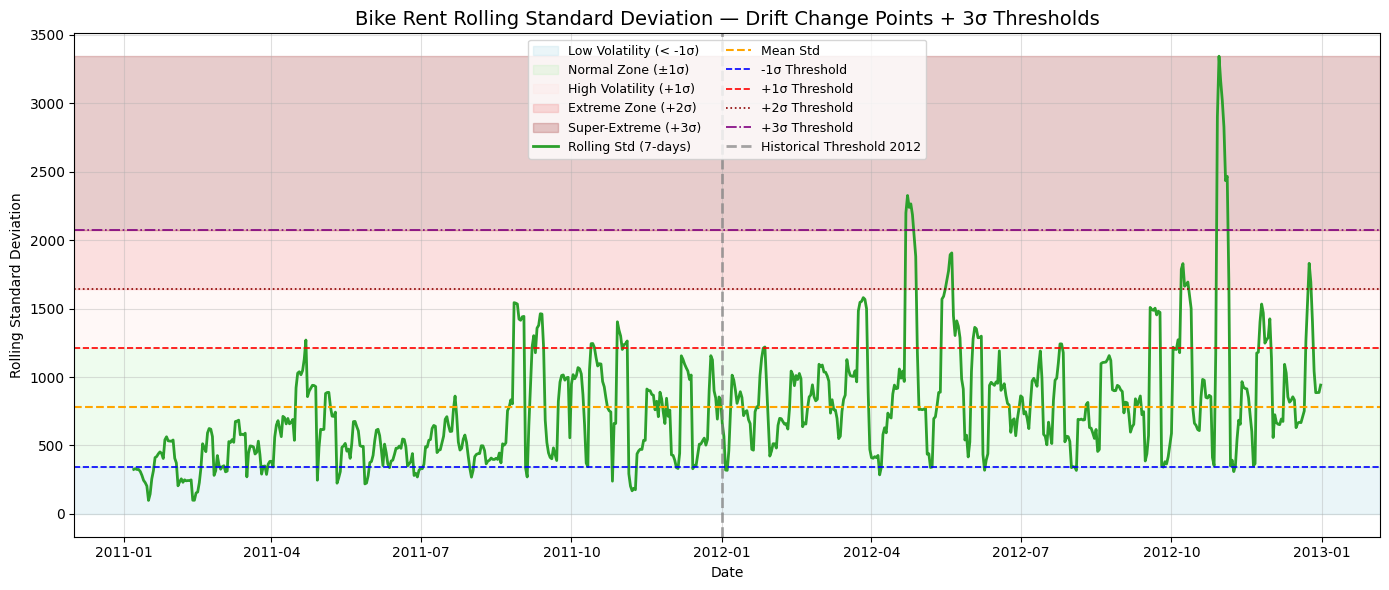

📊 Rolling Std Threshold Summary:
Mean Std: 778.1619
Low Threshold (-1σ): 344.9561
High Threshold (+1σ): 1211.3677
Extreme Threshold (+2σ): 1644.5736
Super-Extreme Threshold (+3σ): 2077.7794
Breakpoints trovati (raw): [725]
Numero di date rilevate: 0

📍 Detected Drift Change Points:


In [48]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "ruptures"])
import ruptures as rpt

WINDOW = 7
roll_std = DataFrame["cnt"].rolling(WINDOW).std().dropna()

x = roll_std.index.to_pydatetime()
signal_2d = roll_std.values.reshape(-1, 1) 

# ---- 2) Change point detection (drift / slope) ----

MODEL = "linear"
PENALTY = 3
MIN_SIZE = 10

print(len(roll_std))

if len(roll_std) < 3 * MIN_SIZE:
    MIN_SIZE = max(6, len(roll_std) // 6)

algo = rpt.Pelt(model=MODEL, min_size=MIN_SIZE).fit(signal_2d)
bkps = algo.predict(pen=PENALTY)
cp_idx = [i - 1 for i in bkps[:-1] if i - 1 >= 0]
cp_dates = [x[i] for i in cp_idx]

# ---- 3) Compute thresholds ----
mean_std = roll_std.mean()
std_std  = roll_std.std()
low_th   = mean_std - std_std
high_th  = mean_std + std_std
ext_th   = mean_std + 2 * std_std
super_th = mean_std + 3 * std_std  # new 3σ threshold

# ---- 4) Plot with colors and labeled drifts ----
fig, ax = plt.subplots(figsize=(14, 6))

# Colored threshold regions
ax.axhspan(0, low_th, color='lightblue', alpha=0.25, label='Low Volatility (< -1σ)')
ax.axhspan(low_th, high_th, color='lightgreen', alpha=0.15, label='Normal Zone (±1σ)')
ax.axhspan(high_th, ext_th, color='mistyrose', alpha=0.25, label='High Volatility (+1σ)')
ax.axhspan(ext_th, super_th, color='lightcoral', alpha=0.25, label='Extreme Zone (+2σ)')
ax.axhspan(super_th, roll_std.max(), color='darkred', alpha=0.2, label='Super-Extreme (+3σ)')

# Rolling Std curve
ax.plot(roll_std.index, roll_std.values, color='tab:green', lw=2, label=f'Rolling Std ({WINDOW}-days)')

# Threshold reference lines
ax.axhline(mean_std,   color='orange',  lw=1.5, ls='--', label='Mean Std')
ax.axhline(low_th,     color='blue',    lw=1.2, ls='--', label='-1σ Threshold')
ax.axhline(high_th,    color='red',     lw=1.2, ls='--', label='+1σ Threshold')
ax.axhline(ext_th,     color='darkred', lw=1.2, ls=':',  label='+2σ Threshold')
ax.axhline(super_th,   color='purple',  lw=1.2, ls='-.', label='+3σ Threshold')

# Drift change-points
for i, d in enumerate(cp_dates):
    ax.axvline(d, color='purple', lw=1.8, alpha=0.9)

# --- Add vertical historical thresholds ---
for year, color in zip([2012], ['gray']):
    ax.axvline(pd.Timestamp(f"{year}-01-01"), color=color, lw=2, ls='--', alpha=0.7,
               label=f'Historical Threshold {year}')

# Formatting
ax.set_title("Bike Rent Rolling Standard Deviation — Drift Change Points + 3σ Thresholds", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Standard Deviation")
ax.legend(loc='upper center', fontsize=9, ncol=2)
ax.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# ---- 5) Summary ----
print("📊 Rolling Std Threshold Summary:")
print(f"Mean Std: {mean_std:.4f}")
print(f"Low Threshold (-1σ): {low_th:.4f}")
print(f"High Threshold (+1σ): {high_th:.4f}")
print(f"Extreme Threshold (+2σ): {ext_th:.4f}")
print(f"Super-Extreme Threshold (+3σ): {super_th:.4f}")
print(f"Breakpoints trovati (raw): {bkps}")
print(f"Numero di date rilevate: {len(cp_dates)}")
print("\n📍 Detected Drift Change Points:")

for i, d in enumerate(cp_dates):
    print(f"  {i+1}° Drift → {d.date()}")


# Standardizzo sia in Media che in varianza

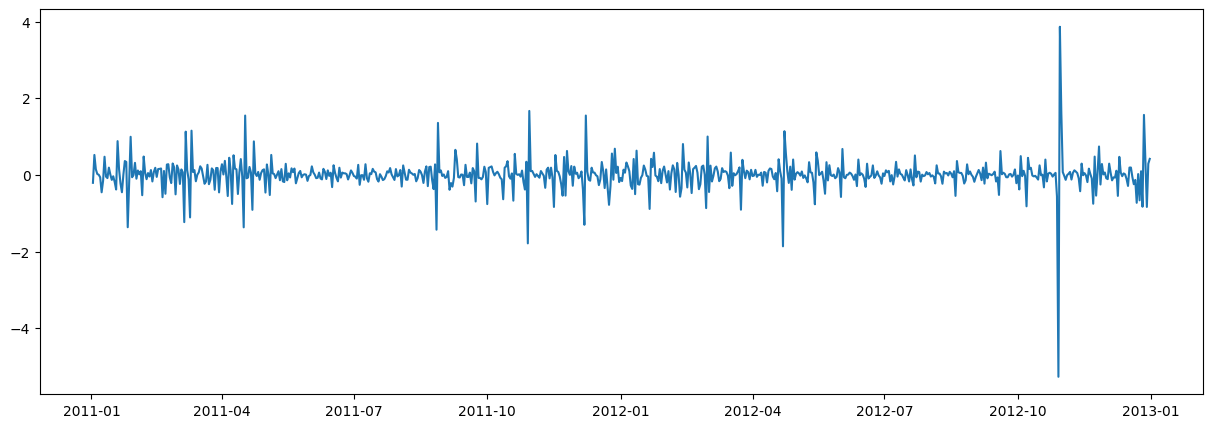

In [49]:
#Stazionarizzo la mia distribuzione 

# Fa tutto quello che faceva il tuo ciclo for, ma giusto e veloce
DataFrame["cnt_std"] = np.log1p(DataFrame["cnt"])
DataFrame["cnt_std"] = DataFrame["cnt_std"].diff()
DataFrame.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.plot(DataFrame["cnt_std"])

plt.show()

Risultati Test Augmented Dickey-Fuller
------------------------------------
ADF Statistic: -10.4414
p-value: 0.0000
Result: La distribuzione è stazionaria


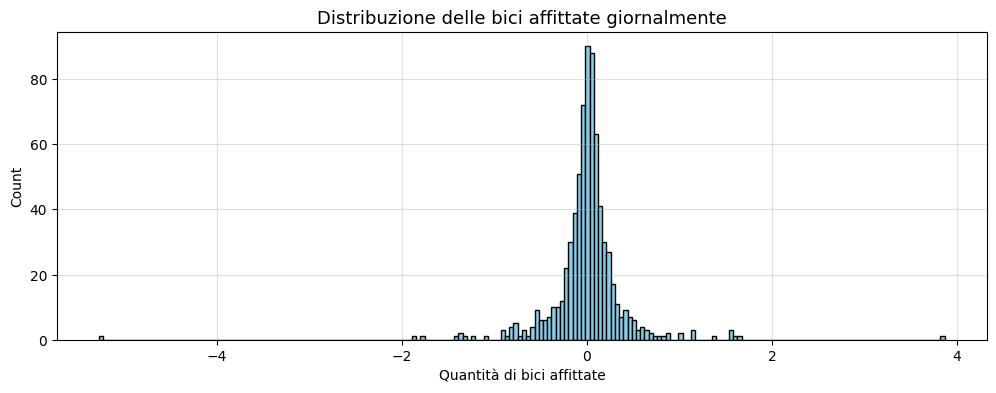

In [50]:
adf_result = adfuller(DataFrame["cnt_std"])
adf_pval = adf_result[1]

print("Risultati Test Augmented Dickey-Fuller")
print("------------------------------------")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_pval:.4f}")
print(f"Result: {'La distribuzione è stazionaria' if adf_pval < 0.05 else 'La distribuzione non è stazionaria'}")


plt.figure(figsize=(12, 4))
plt.hist(DataFrame["cnt_std"],bins = 200,  edgecolor='black', color='skyblue')
plt.title("Distribuzione delle bici affittate giornalmente", fontsize=13)
plt.xlabel("Quantità di bici affittate"); plt.ylabel("Count")
plt.grid(alpha=0.4)
plt.show()

# Time Dependancies

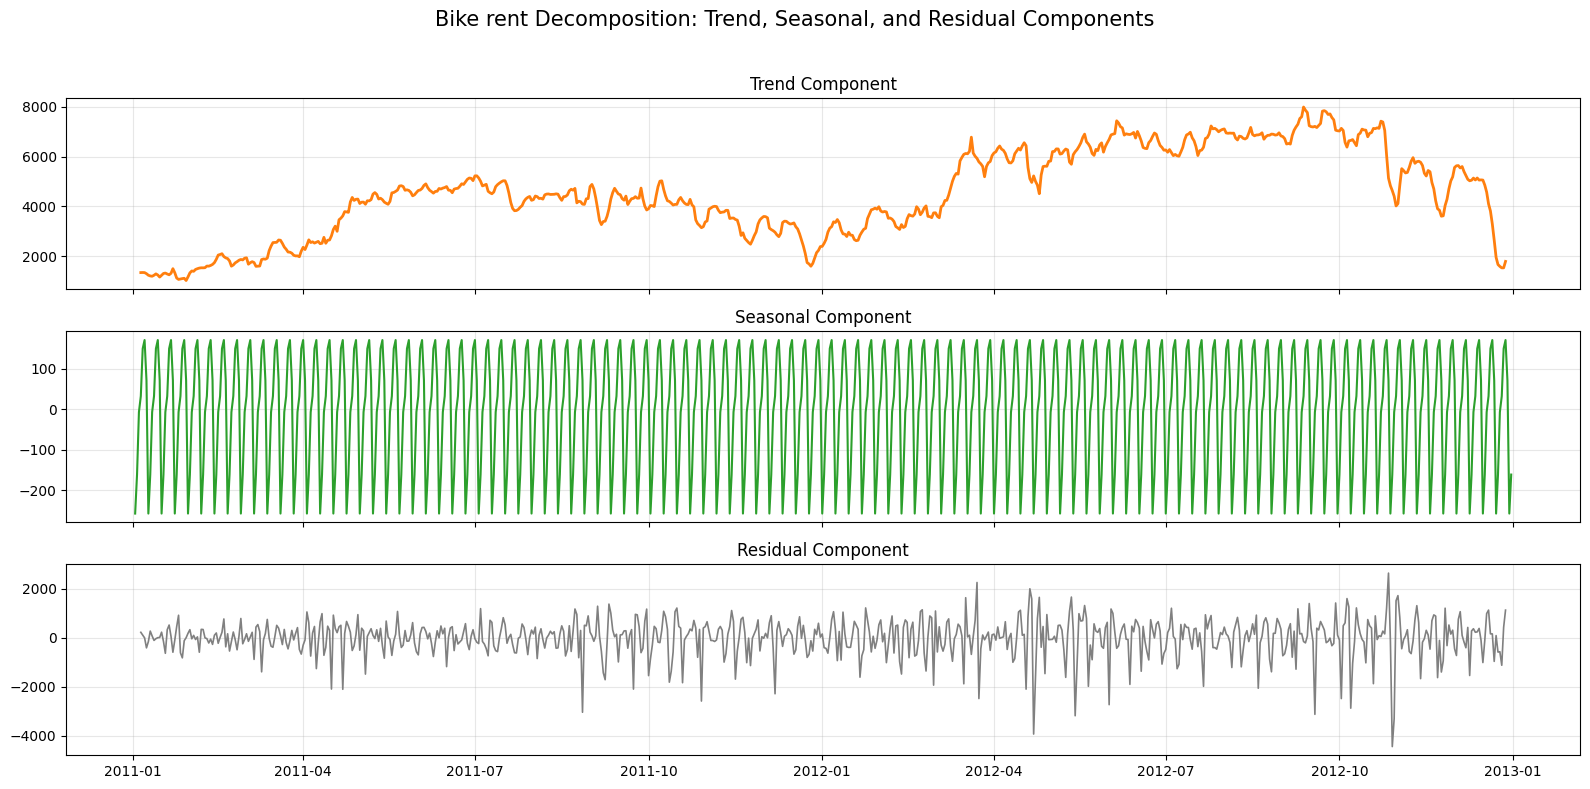

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomp = seasonal_decompose(DataFrame["cnt"], model="additive", period=7)

fig, axes = plt.subplots(3, 1, figsize=(16, 8), sharex=True)
fig.suptitle("Bike rent Decomposition: Trend, Seasonal, and Residual Components", fontsize=15)
axes[0].plot(decomp.trend, color='tab:orange', lw=2)
axes[0].set_title("Trend Component")
axes[1].plot(decomp.seasonal, color='tab:green', lw=1.5)
axes[1].set_title("Seasonal Component")
axes[2].plot(decomp.resid, color='gray', lw=1.2)
axes[2].set_title("Residual Component")

for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Misuro l'auto correlazion e la partial auto correlation

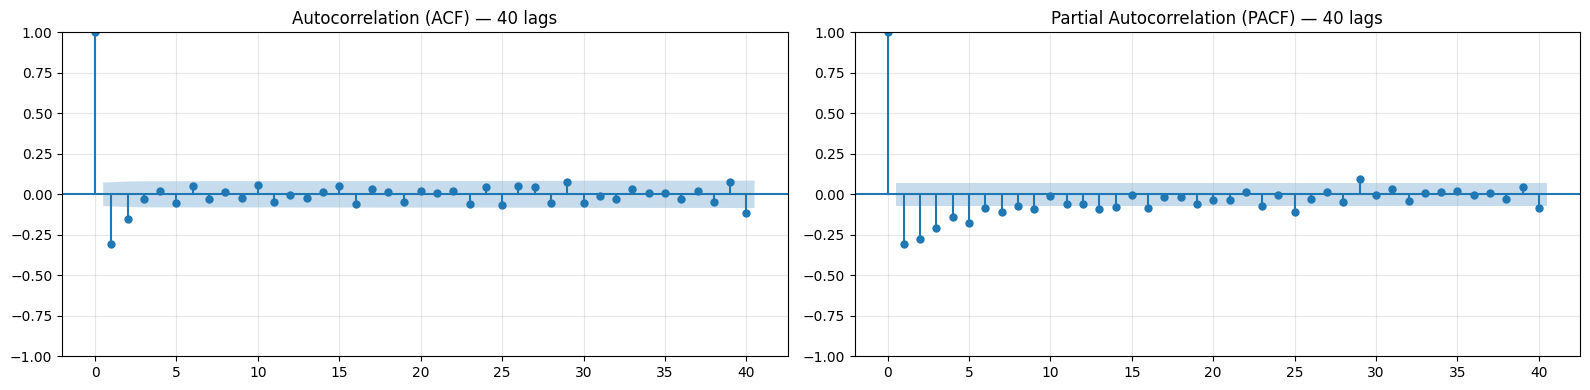

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF_LAGS = 40
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(DataFrame["cnt_std"], lags=ACF_LAGS, ax=axes[0])
axes[0].set_title(f"Autocorrelation (ACF) — {ACF_LAGS} lags")
plot_pacf(DataFrame["cnt_std"], lags=ACF_LAGS, ax=axes[1])
axes[1].set_title(f"Partial Autocorrelation (PACF) — {ACF_LAGS} lags")

for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
#La Partial autocorrelation ci fa notare che è presente una buona correlazione inversa nei primi 5 instanti tempporali, analizzando il problema pero penso che i miei modelli possano beneficiare di una memoria lag lunga 7  


# Feature Extraction

In [54]:
#Proviamo a includere informazioni esogene per arricchire le informazioni 

print(DataFrame.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Catastrofic_evts', 'cnt_std'],
      dtype='object')


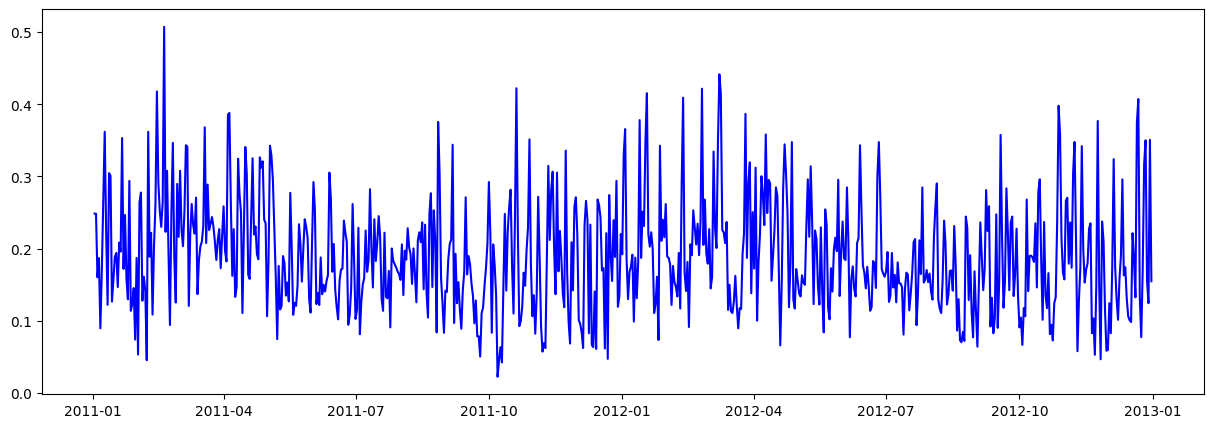

In [55]:
plt.figure(figsize=(15,5))
plt.plot(DataFrame["windspeed"], color='blue')


<Figure size 1500x500 with 0 Axes>

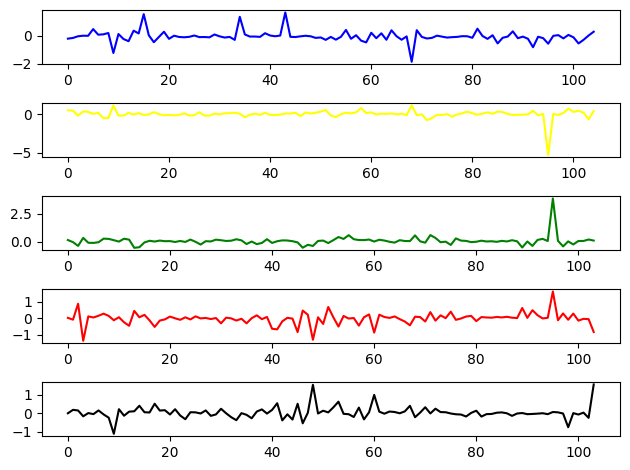

In [56]:
Mon = DataFrame.loc[DataFrame["weekday"] == 0]
tue = DataFrame.loc[DataFrame["weekday"] == 1]
wen = DataFrame.loc[DataFrame["weekday"] == 2]
thu = DataFrame.loc[DataFrame["weekday"] == 3]
fry = DataFrame.loc[DataFrame["weekday"] == 4]


plt.figure(figsize=(15,5))
fig, ax = plt.subplots(5,1)
ax[0].plot(np.arange(105),Mon["cnt_std"], color='blue')
ax[1].plot(np.arange(105),tue["cnt_std"], color='yellow')
ax[2].plot(np.arange(104),wen["cnt_std"], color='green')
ax[3].plot(np.arange(104),thu["cnt_std"], color='red')
ax[4].plot(np.arange(104),fry["cnt_std"], color='black')
plt.tight_layout()
plt.show()


<Figure size 1500x500 with 0 Axes>

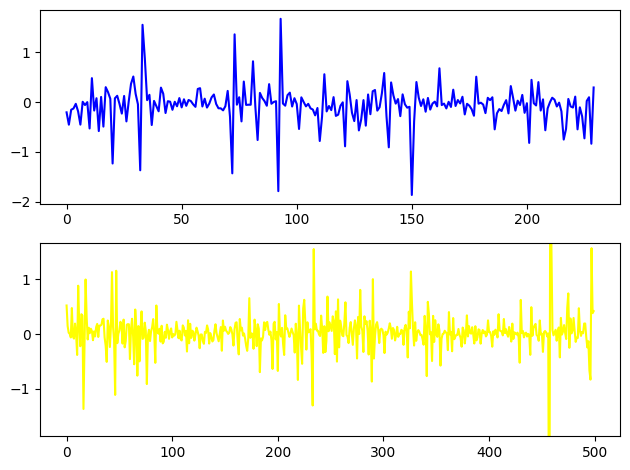

In [57]:
Work = DataFrame.loc[DataFrame["workingday"] == 1]
Week_end = DataFrame.loc[DataFrame["workingday"] == 0]


plt.figure(figsize=(15,5))
fig, ax = plt.subplots(2,1)
ax[0].plot(np.arange(230), Week_end["cnt_std"], color='blue')
ax[1].set_ylim(Week_end["cnt_std"].min(), Week_end["cnt_std"].max())
ax[1].plot(np.arange(500), Work["cnt_std"] ,color='yellow')

plt.tight_layout()
plt.show()


# Prima Feature estraction PCA su valori continui + Lag 7


Varianza spiegata da ogni componente: [0.52561989 0.2847256  0.18767339 0.00198113]
Varianza accumulata: [0.52561989 0.81034549 0.99801887 1.        ]
[[ 1.05964233 -0.19722315  0.83724801  0.00568081]
 [ 2.73947135  0.5951693  -0.46942467  0.06728505]
 [ 2.10436291 -0.83898237 -0.54076727  0.00804217]
 ...
 [ 1.41611576 -1.80748511 -0.07269374  0.0959352 ]
 [ 2.61820721  1.36285902  0.72265052  0.09086049]
 [ 2.00242247 -0.78433012 -0.65047828  0.02037101]]


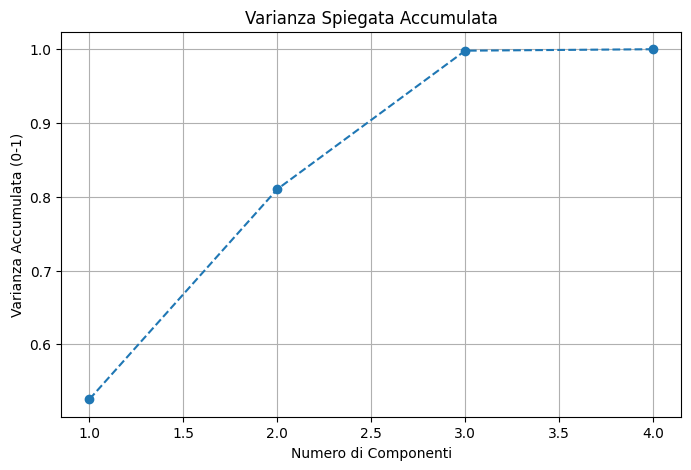

In [58]:
#Make PCA sui dati continui 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 1. SELEZIONE DELLE COLONNE
# Togli il target ('cnt'), le date e le variabili categoriche non ordinali se non sono one-hot encoded
# Esempio: teniamo solo le variabili meteo numeriche per la PCA
features = ['temp', 'atemp', 'hum', 'windspeed'] 

x = StandardScaler().fit_transform(DataFrame[features].values)



# 3. APPLICAZIONE PCA
# Lasciamo n_components vuoto per calcolarle tutte e vedere quante ne servono
pca = PCA()
principalComponents = pca.fit_transform(x)

# Creiamo un DataFrame temporaneo per vedere i risultati
pca_df = pd.DataFrame(data=principalComponents, 
                      columns=[f'PC{i+1}' for i in range(len(features))])


# 4. ANALISI DELLA VARIANZA SPIEGATA
print("Varianza spiegata da ogni componente:", pca.explained_variance_ratio_)
print("Varianza accumulata:", pca.explained_variance_ratio_.cumsum())

print(principalComponents)

# 5. GRAFICO (SCREE PLOT)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(features)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Spiegata Accumulata')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Accumulata (0-1)')
plt.grid()
plt.show()




In [59]:
PC1 = []
for i in range(len(principalComponents)):
    PC1.append(principalComponents[i][0])

PC2 = []
for i in range(len(principalComponents)):
    PC2.append(principalComponents[i][1])

PC3 = []
for i in range(len(principalComponents)):
    PC3.append(principalComponents[i][2])

PC4 = []
for i in range(len(principalComponents)):
    PC4.append(principalComponents[i][3])


In [60]:
#Prendo solo la prima 

DataFrame["PC1"] = PC1
DataFrame["PC2"] = PC2
DataFrame["PC3"] = PC3
DataFrame["PC4"] = PC4

DataFrame

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Catastrofic_evts,cnt_std,PC1,PC2,PC3,PC4
dteday,,,,,,,,,,,,,,,,,,,,
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,-0.206548,1.059642,-0.197223,0.837248,0.005681
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0.520751,2.739471,0.595169,-0.469425,0.067285
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0.146502,2.104363,-0.838982,-0.540767,0.008042
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0.024021,2.262458,0.184109,-1.033002,0.025652
2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,0,0.003741,1.880026,-1.042063,-1.546972,-0.053542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0,1.565500,2.379911,0.528897,1.540607,0.112802
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0,0.381056,1.719848,-0.744538,-0.574120,0.027884
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0,-0.835950,1.416116,-1.807485,-0.072694,0.095935


In [61]:
#Esplicito i dati categorici in modo tale da dare al modello informazioni piu precise e meno fuorvianti


New_var = ["Mon","Tue","wen","thur","fri","sat","sun"]

for i, day_name in enumerate(New_var):
    # Creiamo la colonna: Se 'weekday' è uguale a 'i', metti 1, altrimenti 0
    DataFrame[day_name] = (DataFrame['weekday'] == i).astype(int)






In [62]:
SeasonL = ["springer", "summer", "fall", "winter"]

for i, Season in enumerate(SeasonL):
    # Creiamo la colonna: Se 'weekday' è uguale a 'i', metti 1, altrimenti 0
    DataFrame[Season] = (DataFrame['season'] == i+1).astype(int)




print(DataFrame)

            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-02       1   0     1        0        0           0           2   
2011-01-03       1   0     1        0        1           1           1   
2011-01-04       1   0     1        0        2           1           1   
2011-01-05       1   0     1        0        3           1           1   
2011-01-06       1   0     1        0        4           1           1   
...            ...  ..   ...      ...      ...         ...         ...   
2012-12-27       1   1    12        0        4           1           2   
2012-12-28       1   1    12        0        5           1           2   
2012-12-29       1   1    12        0        6           0           2   
2012-12-30       1   1    12        0        0           0           1   
2012-12-31       1   1    12        0        1           1           2   

                temp     atemp       

In [63]:
MonthL = ["jen","feb","mar","apr","may","jun","jul","aug","sept","oct","nov","dic"]

for i, Month in enumerate(MonthL):
    # Creiamo la colonna: Se 'weekday' è uguale a 'i', metti 1, altrimenti 0
    DataFrame[Month] = (DataFrame['mnth'] == i+1).astype(int)




print(DataFrame)

            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-02       1   0     1        0        0           0           2   
2011-01-03       1   0     1        0        1           1           1   
2011-01-04       1   0     1        0        2           1           1   
2011-01-05       1   0     1        0        3           1           1   
2011-01-06       1   0     1        0        4           1           1   
...            ...  ..   ...      ...      ...         ...         ...   
2012-12-27       1   1    12        0        4           1           2   
2012-12-28       1   1    12        0        5           1           2   
2012-12-29       1   1    12        0        6           0           2   
2012-12-30       1   1    12        0        0           0           1   
2012-12-31       1   1    12        0        1           1           2   

                temp     atemp       

In [64]:
WeatherL = ["GoodW","midW","badW","Really_BadW"]

for i, Weather in enumerate(WeatherL):
    # Creiamo la colonna: Se 'weekday' è uguale a 'i', metti 1, altrimenti 0
    DataFrame[Weather] = (DataFrame['weathersit'] == i).astype(int)




print(DataFrame)

            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-02       1   0     1        0        0           0           2   
2011-01-03       1   0     1        0        1           1           1   
2011-01-04       1   0     1        0        2           1           1   
2011-01-05       1   0     1        0        3           1           1   
2011-01-06       1   0     1        0        4           1           1   
...            ...  ..   ...      ...      ...         ...         ...   
2012-12-27       1   1    12        0        4           1           2   
2012-12-28       1   1    12        0        5           1           2   
2012-12-29       1   1    12        0        6           0           2   
2012-12-30       1   1    12        0        0           0           1   
2012-12-31       1   1    12        0        1           1           2   

                temp     atemp       

# Informazioni Temporali

In [65]:
#A partire dalla Partial Correlation Analysis si è optato per scegliere una lag con memoria grande 5 

def add_lag_features(df, target_col, memory, drop_nan=True):
    """
    Aggiunge colonne di lag a un DataFrame.
    
    Parametri:
    - df: Il DataFrame originale.
    - target_col: Il nome della colonna da 'laggare' (es. 'cnt').
    - memory: Quanti passi indietro vuoi andare (es. 7).
    - drop_nan: Se True, rimuove le prime righe che contengono NaN.
    
    Ritorna:
    - Un nuovo DataFrame con le colonne aggiunte.
    """
    
    # 1. Creiamo una copia per non sporcare il DF originale fuori dalla funzione
    df_out = df.copy()
    
    # 2. Dizionario per raccogliere i nuovi lag (più veloce di aggiungere colonna per colonna)
    lags_dict = {}
    
    for i in range(1, memory + 1):
        # Nome della nuova colonna, es: cnt_lag_1, cnt_lag_2
        col_name = f"{target_col}_lag_{i}"
        # .shift(i) sposta i dati in basso di i posizioni
        lags_dict[col_name] = df_out[target_col].shift(i)
        
    # 3. Concatenazione finale
    # Creiamo un DF temporaneo dai lag e lo uniamo all'originale
    df_lags = pd.DataFrame(lags_dict, index=df_out.index)
    df_out = pd.concat([df_out, df_lags], axis=1)
    
    # 4. Pulizia (Opzionale ma consigliata)
    if drop_nan:
        df_out.dropna(inplace=True)
        print(f"Rimossi i primi {memory} valori NaN creati dai lag.")
        
    return df_out

Temp_Data = add_lag_features(DataFrame, "cnt", 7)
Temp_Data = Temp_Data[["cnt","cnt_lag_1","cnt_lag_2","cnt_lag_3","cnt_lag_4","cnt_lag_5", "cnt_lag_6","cnt_lag_7"]]
Temp_Data_std = add_lag_features(DataFrame, "cnt_std", 7)
Temp_Data_std = Temp_Data_std[["cnt_std","cnt_std_lag_1","cnt_std_lag_2","cnt_std_lag_3","cnt_std_lag_4","cnt_std_lag_5", "cnt_std_lag_6","cnt_std_lag_7"]]
print(Temp_Data)
print(Temp_Data_std)

Rimossi i primi 7 valori NaN creati dai lag.
Rimossi i primi 7 valori NaN creati dai lag.
             cnt  cnt_lag_1  cnt_lag_2  cnt_lag_3  cnt_lag_4  cnt_lag_5  \
dteday                                                                    
2011-01-09   822      959.0     1510.0     1606.0     1600.0     1562.0   
2011-01-10  1321      822.0      959.0     1510.0     1606.0     1600.0   
2011-01-11  1263     1321.0      822.0      959.0     1510.0     1606.0   
2011-01-12  1162     1263.0     1321.0      822.0      959.0     1510.0   
2011-01-13  1406     1162.0     1263.0     1321.0      822.0      959.0   
...          ...        ...        ...        ...        ...        ...   
2012-12-27  2114      441.0     1013.0      920.0     1787.0     1749.0   
2012-12-28  3095     2114.0      441.0     1013.0      920.0     1787.0   
2012-12-29  1341     3095.0     2114.0      441.0     1013.0      920.0   
2012-12-30  1796     1341.0     3095.0     2114.0      441.0     1013.0   
2012-12-31

### Merging

In [66]:
DataFrame = DataFrame.drop(["cnt","cnt_std"], axis = 1)

Dataset_Tot =  DataFrame.join([Temp_Data,Temp_Data_std])
Dataset_Tot.dropna(inplace = True)
print(Dataset_Tot)

            season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-09       1   0     1        0        0           0           1   
2011-01-10       1   0     1        0        1           1           1   
2011-01-11       1   0     1        0        2           1           2   
2011-01-12       1   0     1        0        3           1           1   
2011-01-13       1   0     1        0        4           1           1   
...            ...  ..   ...      ...      ...         ...         ...   
2012-12-27       1   1    12        0        4           1           2   
2012-12-28       1   1    12        0        5           1           2   
2012-12-29       1   1    12        0        6           0           2   
2012-12-30       1   1    12        0        0           0           1   
2012-12-31       1   1    12        0        1           1           2   

                temp     atemp       

In [67]:
Dataset_Tot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723 entries, 2011-01-09 to 2012-12-31
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            723 non-null    int64  
 1   yr                723 non-null    int64  
 2   mnth              723 non-null    int64  
 3   holiday           723 non-null    int64  
 4   weekday           723 non-null    int64  
 5   workingday        723 non-null    int64  
 6   weathersit        723 non-null    int64  
 7   temp              723 non-null    float64
 8   atemp             723 non-null    float64
 9   hum               723 non-null    float64
 10  windspeed         723 non-null    float64
 11  casual            723 non-null    int64  
 12  registered        723 non-null    int64  
 13  Catastrofic_evts  723 non-null    int64  
 14  PC1               723 non-null    float64
 15  PC2               723 non-null    float64
 16  PC3               723 non

# Split Train Validatio Test

In [68]:
PcaHotLag7 = ["PC1","PC2","holiday","Mon","Tue","wen","thur","fri","sat","sun","GoodW","midW","badW","Really_BadW","springer", "summer", "fall", "winter","jen","feb","mar","apr","may","jun","jul","aug","sept","oct","nov","dic","cnt_std_lag_1","cnt_std_lag_2","cnt_std_lag_3","cnt_std_lag_4","cnt_std_lag_5", "cnt_std_lag_6","cnt_std_lag_7","Catastrofic_evts"]
PcaLag7 = ["PC1","PC2",'season',"holiday",'weekday', 'workingday','weathersit',"Catastrofic_evts","cnt_lag_1","cnt_lag_2","cnt_lag_3","cnt_lag_4","cnt_lag_5", "cnt_lag_6","cnt_lag_7"]
RawLag7 = ['season', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'Catastrofic_evts',"cnt_lag_1","cnt_lag_2","cnt_lag_3","cnt_lag_4","cnt_lag_5", "cnt_lag_6","cnt_lag_7"]
No_stat= ["PC1","PC2","holiday","Mon","Tue","wen","thur","fri","sat","sun","midW","badW","Really_BadW","springer", "summer", "fall", "winter","jen","feb","mar","apr","may","jun","jul","aug","sept","oct","nov","dic","cnt_lag_1","cnt_lag_2","cnt_lag_3","cnt_lag_4","cnt_lag_5", "cnt_lag_6","cnt_lag_7"]


In [69]:
from sklearn.model_selection import train_test_split

standardize = ["cnt_lag_1","cnt_lag_2","cnt_lag_3","cnt_lag_4","cnt_lag_5", "cnt_lag_6","cnt_lag_7"]
standardize_st = ["cnt_std_lag_1","cnt_std_lag_2","cnt_std_lag_3","cnt_std_lag_4","cnt_std_lag_5", "cnt_std_lag_6","cnt_std_lag_7"]

X1 = Dataset_Tot[No_stat].copy()
X1_std = Dataset_Tot[PcaHotLag7].copy()
y_Std = Dataset_Tot["cnt_std"].copy()

X1[standardize] = (X1[standardize] - X1[standardize].min())/ (X1[standardize].max() - X1[standardize].min())
X1_std[standardize_st] = (X1_std[standardize_st] - X1_std[standardize_st].min())/ (X1_std[standardize_st].max() - X1_std[standardize_st].min())

y_NoStd = Dataset_Tot["cnt"].copy()

y_NoStd = (y_NoStd - y_NoStd.min())/ (y_NoStd.max() - y_NoStd.min())

y_Std = (y_Std - y_Std.min())/ (y_Std.max() - y_Std.min())

X_train, X_test, y_train, y_test = train_test_split(X1_std, y_Std, test_size = 0.2, shuffle=False)


X_train

,PC1,PC2,holiday,Mon,Tue,wen,thur,fri,sat,sun,...,nov,dic,cnt_std_lag_1,cnt_std_lag_2,cnt_std_lag_3,cnt_std_lag_4,cnt_std_lag_5,cnt_std_lag_6,cnt_std_lag_7,Catastrofic_evts
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-09,3.630848,1.372522,0,1,0,0,0,0,0,0,...,0,0,0.527123,0.570047,0.577202,0.579423,0.592834,0.633815,0.554175,0
2011-01-10,2.908684,0.051092,0,0,1,0,0,0,0,0,...,0,0,0.559931,0.527123,0.570047,0.577202,0.579423,0.592834,0.633815,0
2011-01-11,2.025970,-1.690203,0,0,0,1,0,0,0,0,...,0,0,0.628690,0.559931,0.527123,0.570047,0.577202,0.579423,0.592834,0
2011-01-12,2.878438,0.206030,0,0,0,0,1,0,0,0,...,0,0,0.571879,0.628690,0.559931,0.527123,0.570047,0.577202,0.579423,0
2011-01-13,3.134008,0.776044,0,0,0,0,0,1,0,0,...,0,0,0.567673,0.571879,0.628690,0.559931,0.527123,0.570047,0.577202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-04,-1.969693,1.415594,0,0,0,0,0,0,0,1,...,0,0,0.575488,0.572085,0.582180,0.578489,0.584914,0.575341,0.573263,0
2012-08-05,-1.751016,1.438931,0,1,0,0,0,0,0,0,...,0,0,0.571301,0.575488,0.572085,0.582180,0.578489,0.584914,0.575341,0
2012-08-06,-2.140883,0.042156,0,0,1,0,0,0,0,0,...,0,0,0.552458,0.571301,0.575488,0.572085,0.582180,0.578489,0.584914,0


# Primo modello Regressione 

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
 

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def Regressione_standard(X_train, Y_train,X_val,Y_val):
    regr = LinearRegression()
    regr.fit(X_train, Y_train)  # y as array for sklearn
    pred_val = regr.predict(X_val)
    
    

    
    mse  = mean_squared_error(Y_val, pred_val)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(Y_val, pred_val)
    corr, _ = stats.pearsonr(pred_val, Y_val)
    R2 = r2_score(Y_val, pred_val)
    mape = smape(Y_val, pred_val)
    
    df_results = pd.DataFrame({
        'Reale': Y_val, 
        'Predetto': pred_val
    }, index=Y_val.index) # Mantiene le date!

    print(df_results)
    # Plotta usando questo nuovo dataframe
    plt.figure(figsize=(15, 5))
    plt.plot(df_results['Reale'], label='Reale', color='blue')
    plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
    plt.legend()
    plt.show()
    
    print(f"Corr: {corr.item():.3f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f} | MAPE: {mape:.2f}%")

    return regr,pred_val

               Reale  Predetto
dteday                        
2012-08-09  0.573127  0.581230
2012-08-10  0.551554  0.563313
2012-08-11  0.586093  0.570762
2012-08-12  0.580970  0.580007
2012-08-13  0.582322  0.582588
...              ...       ...
2012-12-27  0.748218  0.675849
2012-12-28  0.618519  0.532272
2012-12-29  0.485254  0.498903
2012-12-30  0.608762  0.558867
2012-12-31  0.622584  0.540633

[145 rows x 2 columns]


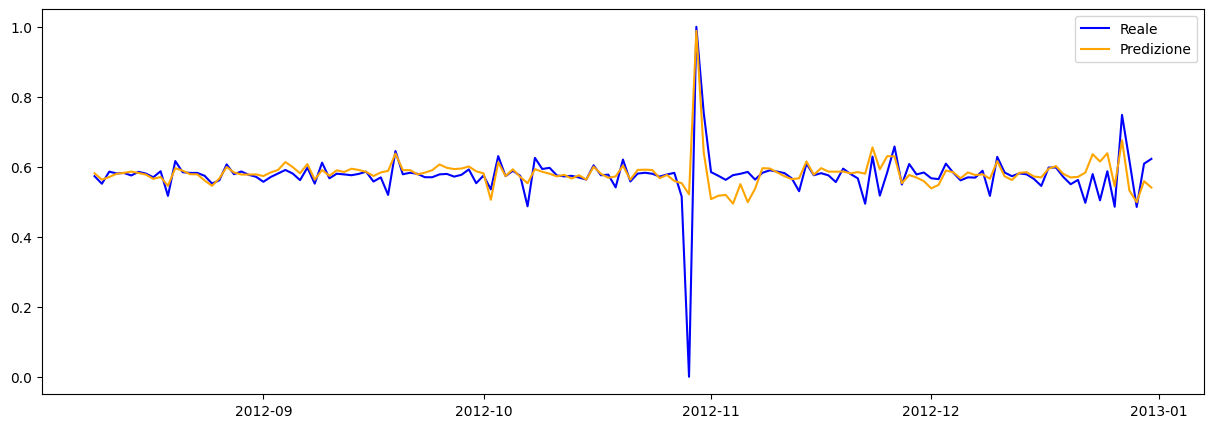

Corr: 0.635 | MSE: 0.0029 | RMSE: 0.0535 | MAE: 0.0243 | R2: 0.3965 | MAPE: 4.98%


In [71]:
Model1, P1 =  Regressione_standard(X_train, y_train,X_test,y_test)
P1 = P1.flatten()


Text(0, 0.5, 'Residuals')

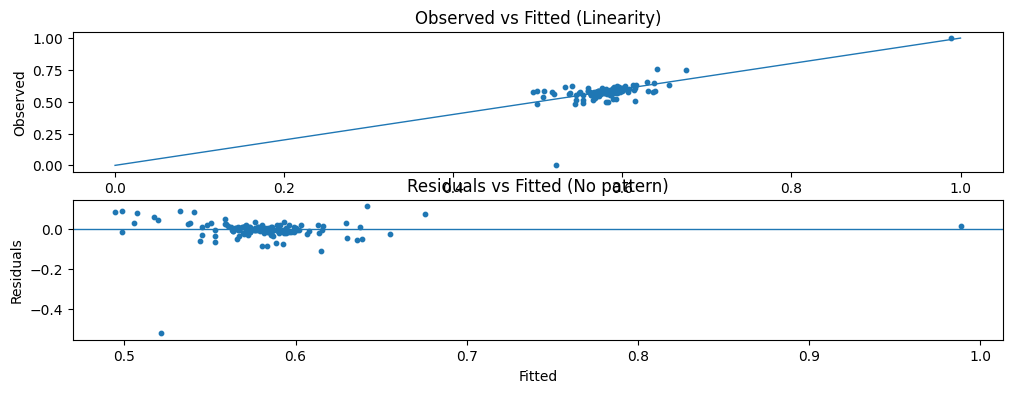

In [72]:


fig, ax = plt.subplots(2,1,figsize=(12,4))

ax[0].scatter(P1, y_test, s=10)
mn = np.min([P1.min(), y_test.values.min()])
mx = np.max([P1.max(), y_test.values.max()])
ax[0].plot([mn, mx], [mn, mx], lw=1)
ax[0].set_title("Observed vs Fitted (Linearity)")
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Observed")



resid = y_test - P1

# (2) Residuals vs Fitted
ax[1].scatter(P1, resid, s=10)
ax[1].axhline(0, lw=1)
ax[1].set_title("Residuals vs Fitted (No pattern)")
ax[1].set_xlabel("Fitted")
ax[1].set_ylabel("Residuals")


# Analisi Modello 

In [73]:
# Creiamo un dataframe per associare il nome della feature al suo peso (coefficiente)
def Analisi_Model(DataFrame,Features, regr):   
    weights = pd.DataFrame({
        'Feature': Features,
        'Peso (Beta)': regr.coef_.flatten()
    })
    
    # Ordiniamo per importanza assoluta (sia positiva che negativa)
    weights['Importanza'] = weights['Peso (Beta)'].abs()
    weights_sorted = weights.sort_values(by='Importanza', ascending=False)
    
    print(weights_sorted)

# ARMAX

In [74]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

PcaHot = ["PC1","PC2","holiday","Mon","Tue","wen","thur","fri","sat","sun","midW","badW","Really_BadW","springer", "summer", "fall", "winter","jen","feb","mar","apr","may","jun","jul","aug","sept","oct","nov","dic"]
X1_Arimax = Dataset_Tot[PcaHot].copy()


y_NoStd = (y_NoStd - y_NoStd.min())/ (y_NoStd.max() - y_NoStd.min())

X_train, X_test, y_train, y_test = train_test_split(X1_Arimax, y_NoStd, test_size = 0.2, shuffle=False)



# 2. DEFINIZIONE DEL MODELLO
# order=(p, d, q)
# p = Quanti passi indietro guardo (AR) -> Sostituisce i tuoi lag manuali
# d = Quante differenze faccio (I) -> Se i dati non sono stazionari (metti 1 se c'è trend)
# q = Quanti errori passati correggo (MA) -> La parte che ti mancava!
 

model = SARIMAX(endog=y_train, 
                exog=X_train, 
                order=(7,0,2),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 3. ADDESTRAMENTO
results = model.fit(disp=False)

# Stampa il riassunto statistico (molto utile per vedere i p-value)
print(results.summary())

# 4. PREDIZIONE
# Devi passare le X del futuro (X_test) per prevedere la Y del futuro
predictions = results.get_forecast(steps=len(y_test), exog=X_test)
y_pred = predictions.predicted_mean

 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    cnt   No. Observations:                  578
Model:               SARIMAX(7, 0, 2)   Log Likelihood                 650.025
Date:                Tue, 16 Dec 2025   AIC                          -1222.050
Time:                        15:02:34   BIC                          -1052.502
Sample:                    01-09-2011   HQIC                         -1155.903
                         - 08-08-2012                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PC1            -0.0521      0.007     -7.566      0.000      -0.066      -0.039
PC2             0.0167      0.005      3.112      0.002       0.006       0.027
holiday        -0.0256      0.018     -1.423    

MSE: 0.0172 | RMSE: 0.1312 | MAE: 0.1096 | R2: 0.6317 | MAPE: 20.67% 


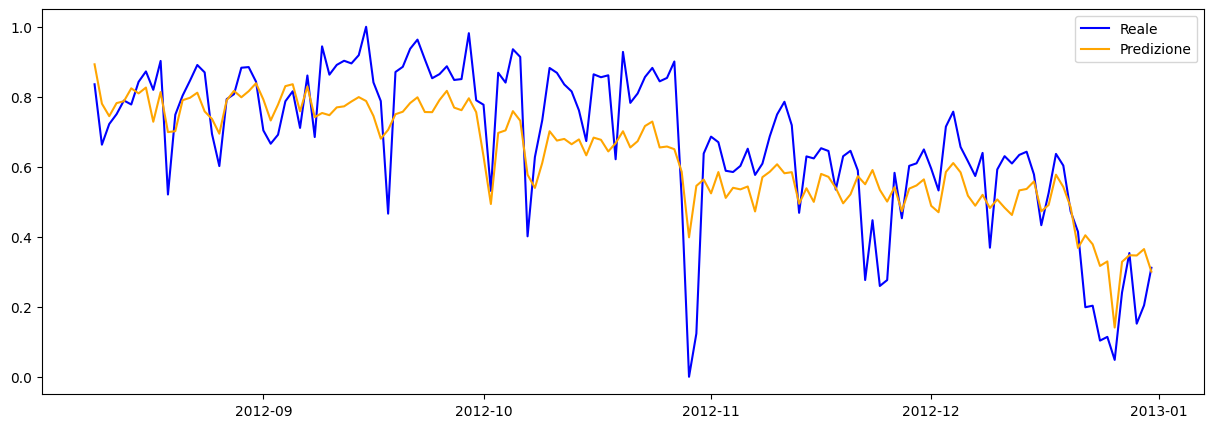

In [75]:

  
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
mape = smape(y_test, y_pred)

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f} | MAPE: {mape:.2f}% ")

df_results = pd.DataFrame({
        'Reale': y_test, 
        'Predetto': y_pred
    }, index=y_test.index) # Mantiene le date!
    
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(df_results['Reale'], label='Reale', color='blue')
plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

# Tecniche ML

--- Matrice Numerica ---
                       PC1       PC2    season   holiday   weekday  \
PC1               1.000000  0.001916 -0.370345  0.034589  0.011253   
PC2               0.001916  1.000000 -0.126097 -0.000157  0.044406   
season           -0.370345 -0.126097  1.000000 -0.013238 -0.000272   
holiday           0.034589 -0.000157 -0.013238  1.000000 -0.102265   
weekday           0.011253  0.044406 -0.000272 -0.102265  1.000000   
workingday       -0.057056 -0.005200  0.010765 -0.254845  0.039293   
weathersit        0.027522 -0.412409  0.022412 -0.034433  0.026593   
Catastrofic_evts  0.013697  0.001592  0.050082 -0.006437 -0.037056   
cnt_lag_1        -0.593986  0.171343  0.397804 -0.055537  0.054779   
cnt_lag_2        -0.572589  0.153557  0.402753 -0.026391  0.009373   
cnt_lag_3        -0.560293  0.129294  0.407013 -0.009415 -0.030122   
cnt_lag_4        -0.563079  0.107469  0.416166 -0.005477 -0.037754   
cnt_lag_5        -0.563919  0.123445  0.419275 -0.020127 -0.03643

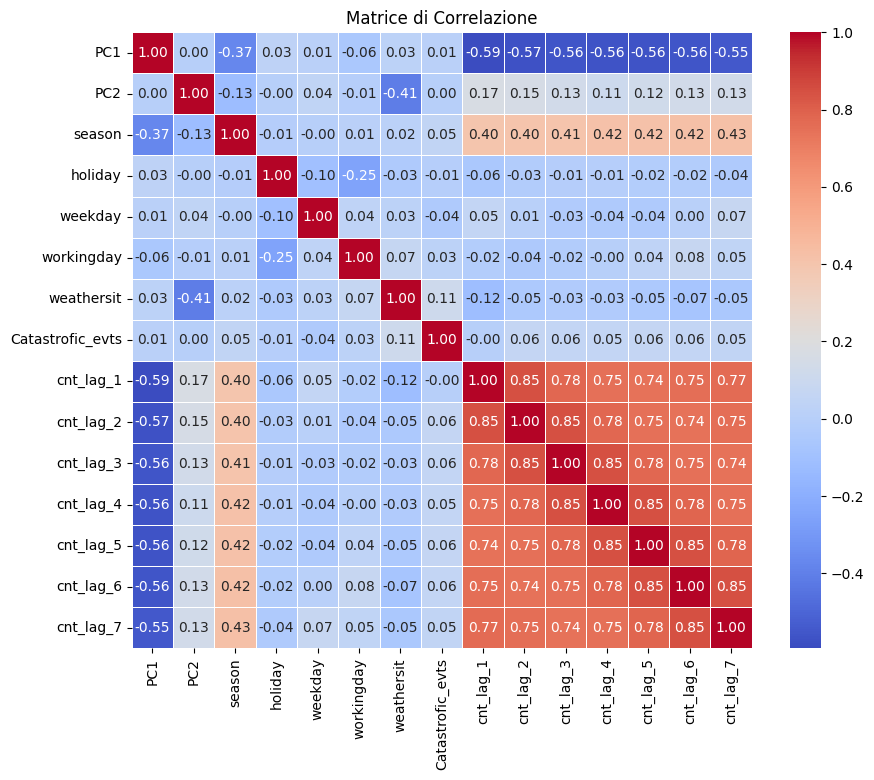

In [76]:
correlation_matrix = Dataset_Tot[PcaLag7].corr()

print("--- Matrice Numerica ---")
print(correlation_matrix)

# 3. Visualizzazione con Heatmap (Seaborn)
plt.figure(figsize=(10, 8))

# Creazione della heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,    # Scrive i valori nelle celle
    cmap='coolwarm', # Scala di colori (Rosso=Positiva, Blu=Negativa)
    fmt=".2f",     # Formato a 2 decimali
    linewidths=0.5 # Linee tra le celle
)

plt.title('Matrice di Correlazione')
plt.show()

               Reale  Predetto
dteday                        
2012-08-09  0.573127  0.573588
2012-08-10  0.551554  0.561467
2012-08-11  0.586093  0.566148
2012-08-12  0.580970  0.570632
2012-08-13  0.582322  0.574991
...              ...       ...
2012-12-27  0.748218  0.623853
2012-12-28  0.618519  0.586712
2012-12-29  0.485254  0.549063
2012-12-30  0.608762  0.600881
2012-12-31  0.622584  0.573717

[145 rows x 2 columns]


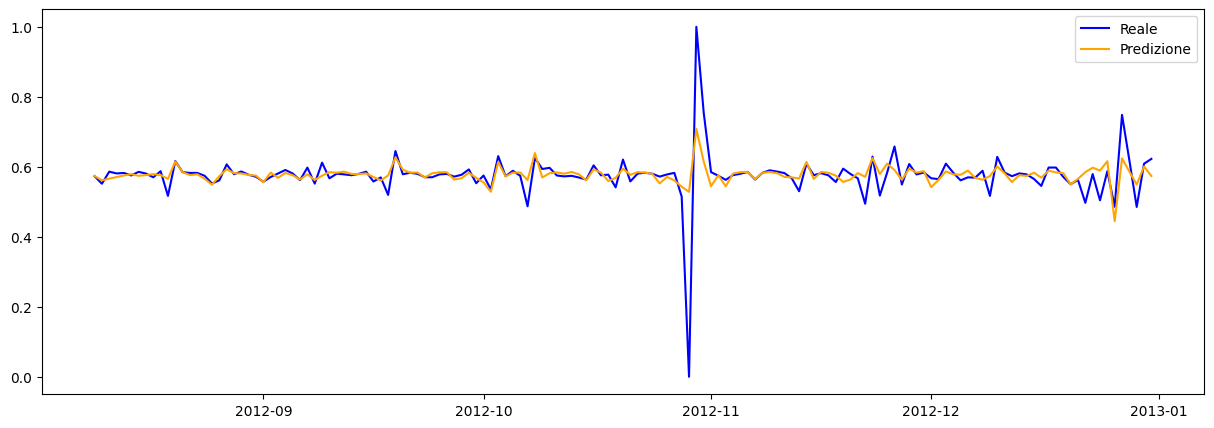

MSE: 0.0033 | RMSE: 0.0573 | MAE: 0.0225 | R2: 0.3079 | MAPE: 4.53% 


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

Features = ["season", "holiday","weekday","workingday",	"weathersit",	"temp",	"hum",	"windspeed","Catastrofic_evts"] 
Solo_lag = ["cnt_std_lag_1","cnt_std_lag_2","cnt_std_lag_3","cnt_std_lag_4","cnt_std_lag_5", "cnt_std_lag_6","cnt_std_lag_7"]
No_lag = ["PC1","PC2","holiday","Mon","Tue","wen","thur","fri","sat","sun","midW","badW","Really_BadW","springer", "summer", "fall", "winter","jen","feb","mar","apr","may","jun","jul","aug","sept","oct","nov","dic"]


X = Dataset_Tot[PcaHotLag7]
y = Dataset_Tot["cnt_std"]

y= (y - y.min())/ (y.max() - y.min())

# 2. Divisione Training set e Test set
# È cruciale: alleniamo su una parte (80%) e testiamo su dati mai visti (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)


# 3. Creazione e Addestramento del Modello
# n_estimators=100 significa che creerà 100 alberi decisionali
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# 4. Predizione e Valutazione
y_pred = rf_model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
mape = smape(y_test, y_pred)




df_results = pd.DataFrame({
        'Reale': y_test.values.flatten(), 
        'Predetto': y_pred.flatten()
    }, index=y_test.index) # Mantiene le date!

print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(df_results['Reale'], label='Reale', color='blue')
plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f} | MAPE: {mape:.2f}% ")


# Grid search per best Iperparametri 

In [78]:

from sklearn.model_selection import GridSearchCV, train_test_split, TimeSeriesSplit



rf = RandomForestRegressor(random_state=42)

# ATTENZIONE: Se sono serie storiche, il Cross-Validation standard (cv=5) NON va bene
# perché mescola il tempo. Se sono serie storiche, usa tscv qui sotto:
# tscv = TimeSeriesSplit(n_splits=5) 
# E poi metti cv=tscv dentro GridSearchCV


param_grid = {
    'n_estimators': [50, 100],      # Numero di alberi (più sono, meglio è, ma più lento)
    'max_depth': [None, 5, 8],         # Profondità massima (None = cresce finché vuole)
    'min_samples_split': [2, 5, 10],     # Minimo dati per dividere un nodo (evita overfitting)
    'min_samples_leaf': [1, 2, 4]        # Minimo dati in una foglia finale
}


grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5,                         # 5-Fold Cross Validation (standard)
    n_jobs=-1,                    # Usa tutti i processori del PC (velocizza molto)
    scoring='neg_mean_squared_error', # Metrica: Errore Quadratico Medio (negativo per convenzione sklearn)
    verbose=1                    # Scrive il progresso mentre lavora
)

# 4. Esecuzione della ricerca
print("Inizio ricerca iperparametri migliori... (può richiedere tempo)")
grid_search.fit(X_train, y_train)

# 5. Risultati
print("\n--- Risultati Grid Search ---")
print(f"Migliori parametri trovati: {grid_search.best_params_}")
print(f"Miglior score (MSE negativo): {grid_search.best_score_:.2f}")

# 6. Testiamo il modello migliore sui dati di test finali
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)




Inizio ricerca iperparametri migliori... (può richiedere tempo)
Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Risultati Grid Search ---
Migliori parametri trovati: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Miglior score (MSE negativo): -0.00


               Reale  Predetto
dteday                        
2012-08-09  0.573127  0.573846
2012-08-10  0.551554  0.566655
2012-08-11  0.586093  0.565413
2012-08-12  0.580970  0.577358
2012-08-13  0.582322  0.574419
...              ...       ...
2012-12-27  0.748218  0.633219
2012-12-28  0.618519  0.585034
2012-12-29  0.485254  0.551617
2012-12-30  0.608762  0.615429
2012-12-31  0.622584  0.584439

[145 rows x 2 columns]


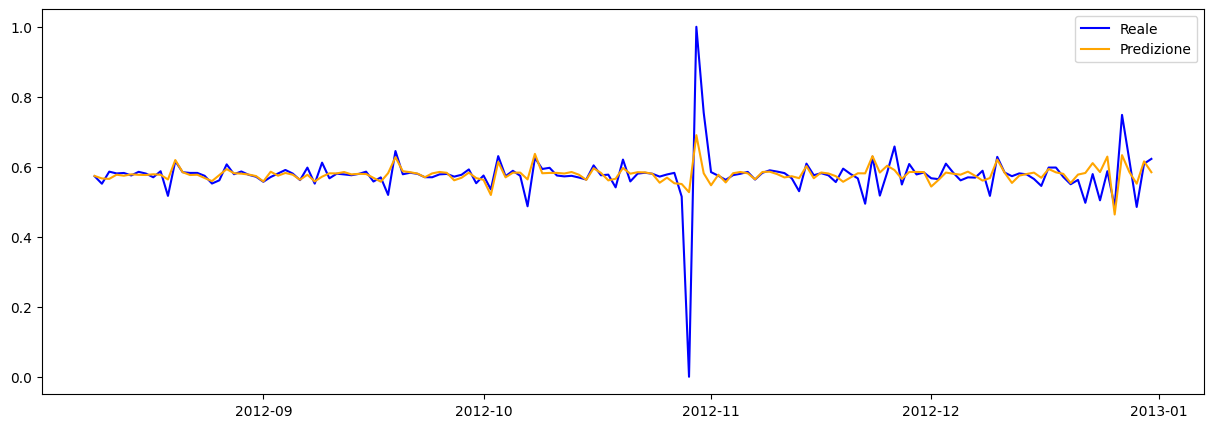

MSE: 0.0034 | RMSE: 0.0584 | MAE: 0.0225 | R2: 0.2811


In [79]:
mse  = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, predictions)

R2 = r2_score(y_test, predictions)

df_results = pd.DataFrame({
        'Reale': y_test.values.flatten(), 
        'Predetto': predictions.flatten()
    }, index=y_test.index) # Mantiene le date!

print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(df_results['Reale'], label='Reale', color='blue')
plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f}")